In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
from pathlib import *
filepath=Path('/home/mz071159/width_struts/results/50_45_leofor_thresholding')
filepath
print(list(filepath.glob('**/bnw_conv.png')))

[PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c002_r001/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c009_r000/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_head_eps5_yolo_pano_c005_r000/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c006_r006/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_4mm_3_eps5_000_stitch_c007_r003/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c011_r004/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_4mm_3_eps5_000_stitch_c007_r006/bnw_conv.png'), PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding

(0.0, 1000.0)

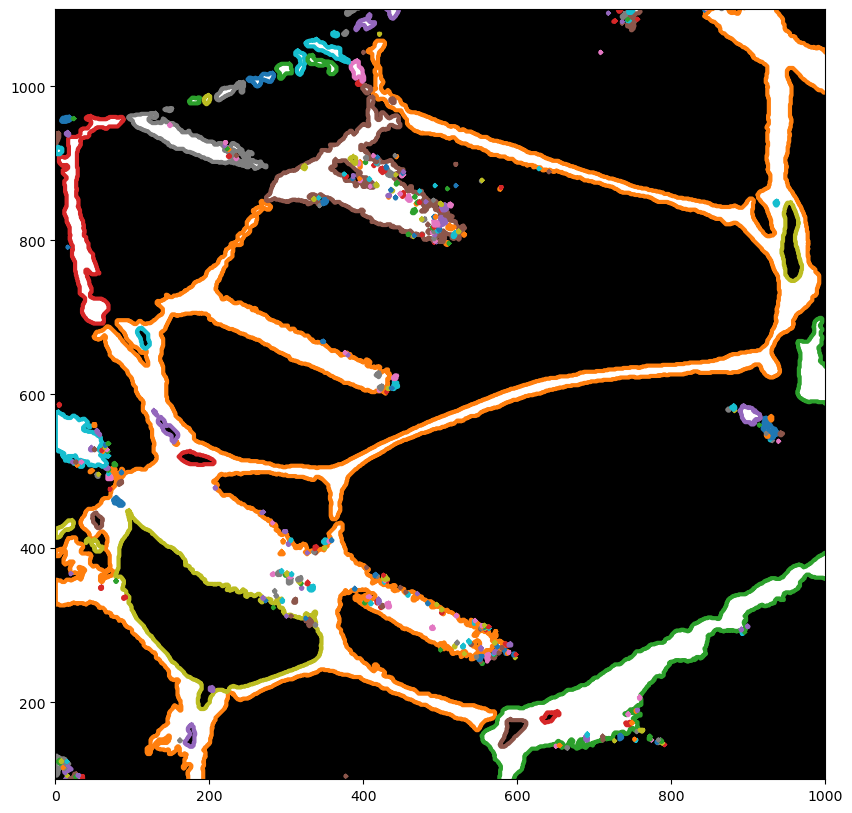

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util 
from skimage import measure
from skimage import io
import pandas as pd
from skimage import morphology
from skimage.util import invert
import scipy
import numpy as np
# Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
img=io.imread("/rwthfs/rz/cluster/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c000_r002/bnw_conv.png")

# img=io.imread("/work/mz071159/quasi-in-situ/50_45_leo/for_thresholding/5mm_3/pano50_45_eps5_leo_5mm_3_stitch_c000_r000.jpg")
# Find contours at a constant value of 0.8
# img=img[:,:,0]
img[:,0]=255
img[:,-1]=255
img[-1,:]=255
img[0,:]=255# Display the image and plot all contours found
contours = measure.find_contours(img,level=55,fully_connected='high',positive_orientation='high')
fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(r, cmap=plt.cm.gray)
ax.imshow(img,alpha=1,cmap='binary')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# # plt.show()


# img_ind=np.where(skel)
# ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)
# ax.imshow(invert(skel),cmap=mpl.cm.gray,zorder=1)
# for contour in conts:
    # ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

x=100
y=0# ax.scatter(img_ind[1],img_ind[0],s=0.05,color='black')
ax.set_ylim(x,x+1000)
ax.set_xlim(y,y+1000)

In [23]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
label_img = label(mg_holes_removed)
# regions = regionprops(label_img,mg_holes_removed)

for region in regions:
    plt.scatter(i,(region.perimeter)/(region.equivalent_diameter_area*3.1415))
    if(region.perimeter)/(region.equivalent_diameter_area*3.1415)>1.5:
        l_list.append(region.label)
    i=i+1
plt.ylabel('perimeter over radius')

NameError: name 'mg_holes_removed' is not defined

In [24]:
label_img = label(invert(img))
properties=['label','bbox','area','area_convex','equivalent_diameter_area','axis_major_length','axis_minor_length']
props=measure.regionprops_table(label_img,img,properties=properties)
df=pd.DataFrame(props)
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,area,area_convex,equivalent_diameter_area,axis_major_length,axis_minor_length
0,1,1,165,2,167,2,2,1.595769,2.000000,0.000000
1,2,1,1,1387,1165,146306,885364,431.604663,1754.359061,648.141337
2,3,1,550,651,1553,70456,441135,299.511879,1192.975373,558.586681
3,4,1,1715,1424,2418,72702,750131,304.248355,1600.630592,713.984180
4,5,1,2460,13,2473,103,119,11.451798,15.763958,9.294414
...,...,...,...,...,...,...,...,...,...,...
1432,1433,3984,1303,3986,1304,2,2,1.595769,2.000000,0.000000
1433,1434,3991,1591,3999,1598,39,42,7.046726,9.737764,5.503965
1434,1435,3993,343,3999,351,31,36,6.282549,8.279063,4.867686
1435,1436,3993,427,3999,443,81,85,10.155413,16.643240,6.463618


In [8]:
mean_diameter=df.loc[(df['area_convex']>5),'axis_minor_length'].mean()
mean_diameter ## we want to use this to find the appropriate parameter for the dilation

21.26967104205666

(0.0, 1000.0)

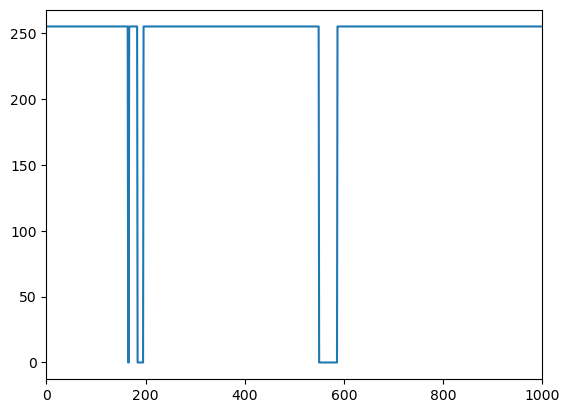

In [46]:
img[1,:]
plt.plot(img[1,:])
plt.xlim(0,1000)

In [50]:
import numpy as np
# https://stackoverflow.com/questions/1066758/find-length-of-sequences-of-identical-values-in-a-numpy-array-run-length-encodi
def rle(inarray):
        """ run length encoding. Partial credit to R rle function. 
            Multi datatype arrays catered for including non Numpy
            returns: tuple (runlengths, startpositions, values) """
        ia = np.asarray(inarray)                # force numpy
        n = len(ia)
        if n == 0: 
            return (None, None, None)
        else:
            y = ia[1:] != ia[:-1]               # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])

In [122]:
l_width=[]
l_pos=[]
l_value=[]
for i in range(0,len(total_ms)):
    [width,pos,value]=rle(total_ms[i,:])
    l_width.append(width)
    l_pos.append(pos)
    l_value.append(value)

In [101]:
    frac_laves=np.count_nonzero(total_ms==1)/(img.shape[0]*img.shape[1])
    frac_mg=np.count_nonzero(total_ms==0)/(img.shape[0]*img.shape[1])
    frac_mg_eut=np.count_nonzero(total_ms==2)/(img.shape[0]*img.shape[1])
    # np.savetxt(fp.parents[1].joinpath('full_segmentation').joinpath(f'{fp.parents[0].stem}_phase_fraction.csv'),[frac_laves,frac_mg,frac_mg_eut],delimiter=';',header='frac_laves;frac_mg;frac_mg_eut',comments='')
    

In [103]:
frac_laves,frac_mg,frac_mg_eut

(0.0862489375, 0.8958068125, 0.01794425)

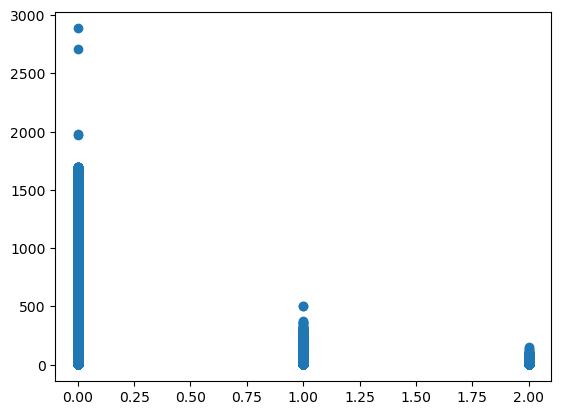

In [123]:
plt.scatter(np.concatenate(l_value),np.concatenate(l_width))#,np.reshape(width,(4000,4000)))

In [133]:
aspect=total_ms.shape[0]/2000
max((4000,2000))

4000

In [134]:
aspect

2.0

In [149]:
if aspect >=1:
    step_x=math.floor(max((4000,2000))/10)
    step_y=math.floor(step_x/aspect)
    n_x=10
    n_y=math.floor(n_x/aspect)
else:
    step_y=math.floor(max((4000,2000))/10)
    step_x=math.floor(step_x/aspect)
    n_y=10
    n_x=math.floor(n_y/aspect)


In [145]:
step_x*i

0

In [151]:
    for i in range(0,n_x):
        [width,pos,value]=rle(total_ms[i*step_x,:])
        print(step_x*i)
        l_width.append(width)
        l_pos.append(pos)
        l_value.append(value)

0
400
800
1200
1600
2000
2400
2800
3200
3600


In [136]:
step_y,step_x

(200.0, 400.0)

In [27]:
dil_iter=(mean_diameter/4)*1.5
print(dil_iter)
dil_iter=math.ceil(dil_iter)
dil_iter


7.976126640771248


8

In [28]:
sns.displot(data=df,x='axis_minor_length')

NameError: name 'sns' is not defined

In [29]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat, disk)
footprint = disk(15)
# dilation=dilation(img==0, footprint)

# closing= closing(invert(img), footprint)


In [30]:
dilation2=scipy.ndimage.binary_dilation(img==0,disk(3),iterations=dil_iter)

In [296]:
dil_iter

8

(0.0, 300.0)

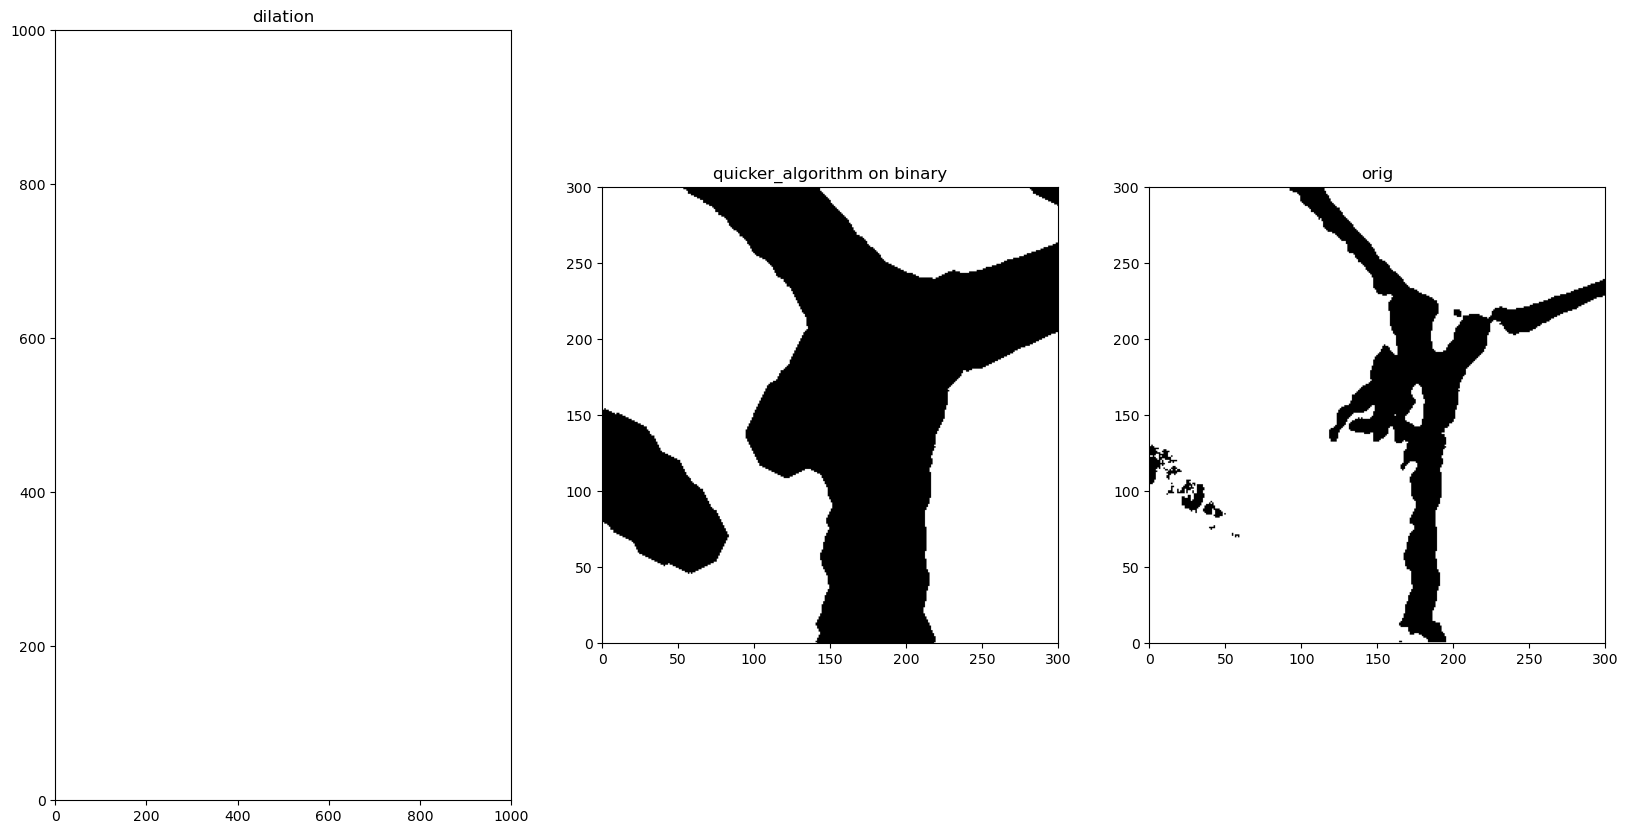

In [31]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
# ax[0].imshow(dilation,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
ax[1].imshow(dilation2,cmap='binary')
ax[1].set_title('quicker_algorithm on binary')
ax[1].set_xlim([0,300])
ax[1].set_ylim([0,300])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,300])
ax[2].set_ylim([0,300])

(0.0, 1500.0)

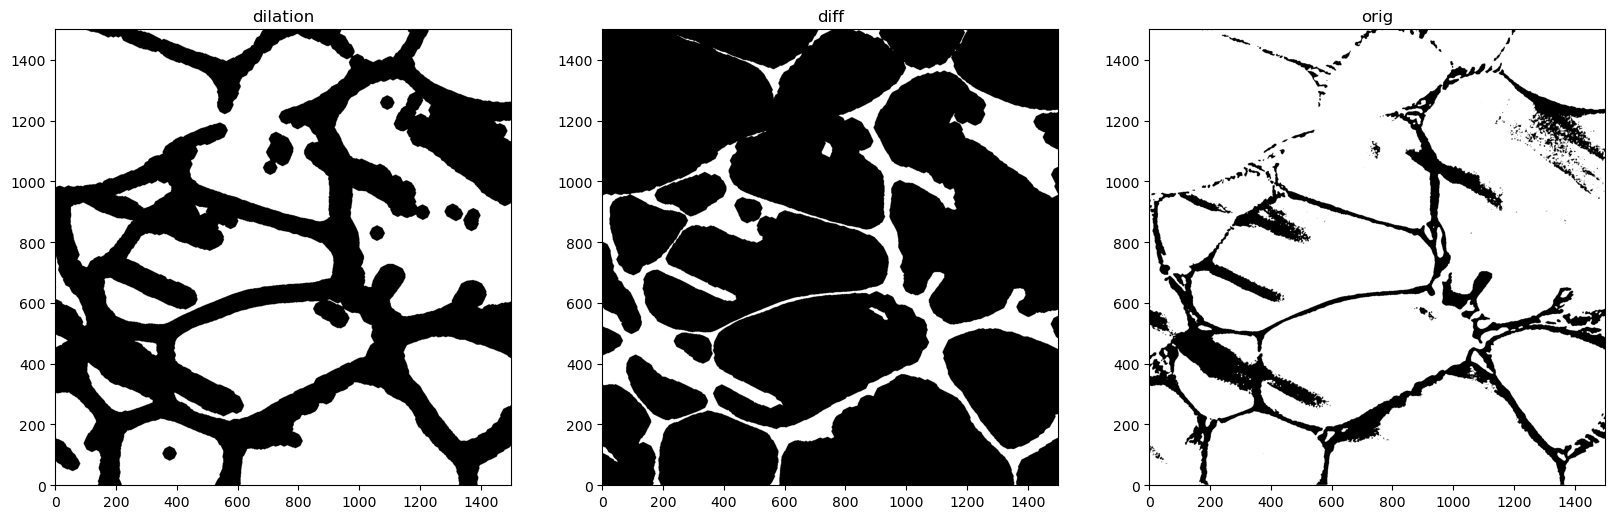

In [32]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(dilation2,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1500])
ax[0].set_ylim([0,1500])
footprint = disk(15)
#erosion=erosion(dilation, footprint)
erosion2=scipy.ndimage.binary_dilation(invert(dilation2),disk(3),iterations=dil_iter+1)
ax[1].imshow(erosion2,cmap='binary')
ax[1].set_title('diff')
ax[1].set_xlim([0,1500])
ax[1].set_ylim([0,1500])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1500])
ax[2].set_ylim([0,1500])

(0.0, 1500.0)

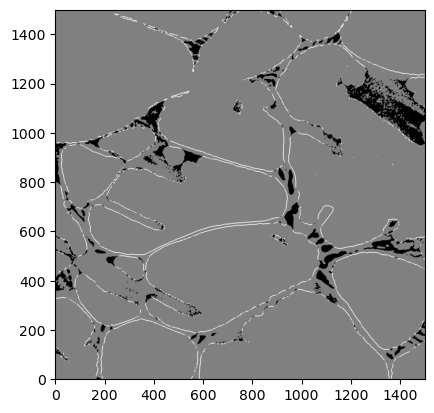

In [33]:
plt.imshow(erosion2-invert(img),cmap='gray')
plt.xlim([0,1500])
plt.ylim([000,1500])

In [36]:
border=dilation2-erosion2
border=border!=0

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [37]:
eutectic_mask=erosion2-invert(img)
eutectic_mask=eutectic_mask==0

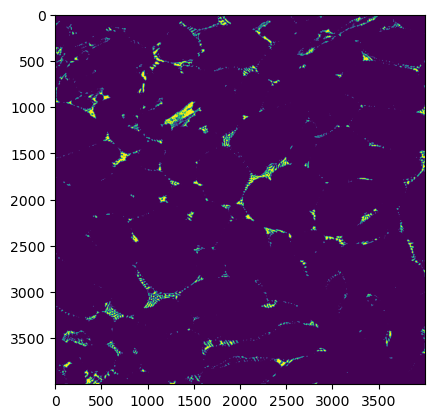

In [38]:
plt.imshow(eutectic_mask)

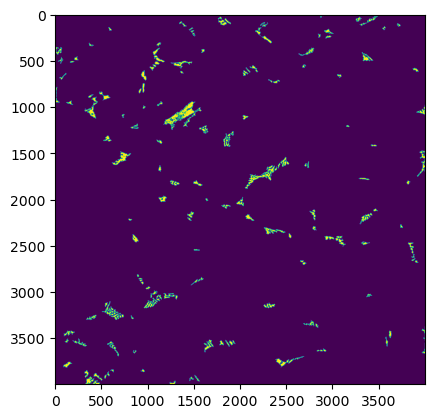

In [39]:
mg_eut_filtered=morphology.remove_small_objects(eutectic_mask,min_size=400)
plt.imshow(mg_eut_filtered)
# plt.xlim([1000,2500])
# plt.ylim([1000,2500])

In [40]:
mg_primary=dilation2==0

In [41]:
mg_primary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [42]:
total_ms=np.zeros((4000,4000))
# total_ms[mg_primary]=1
total_ms[img==0]=1
total_ms[mg_eut_filtered]=2

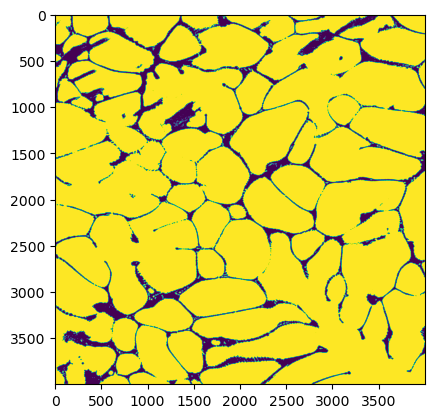

In [45]:
plt.imshow(total_ms==0)

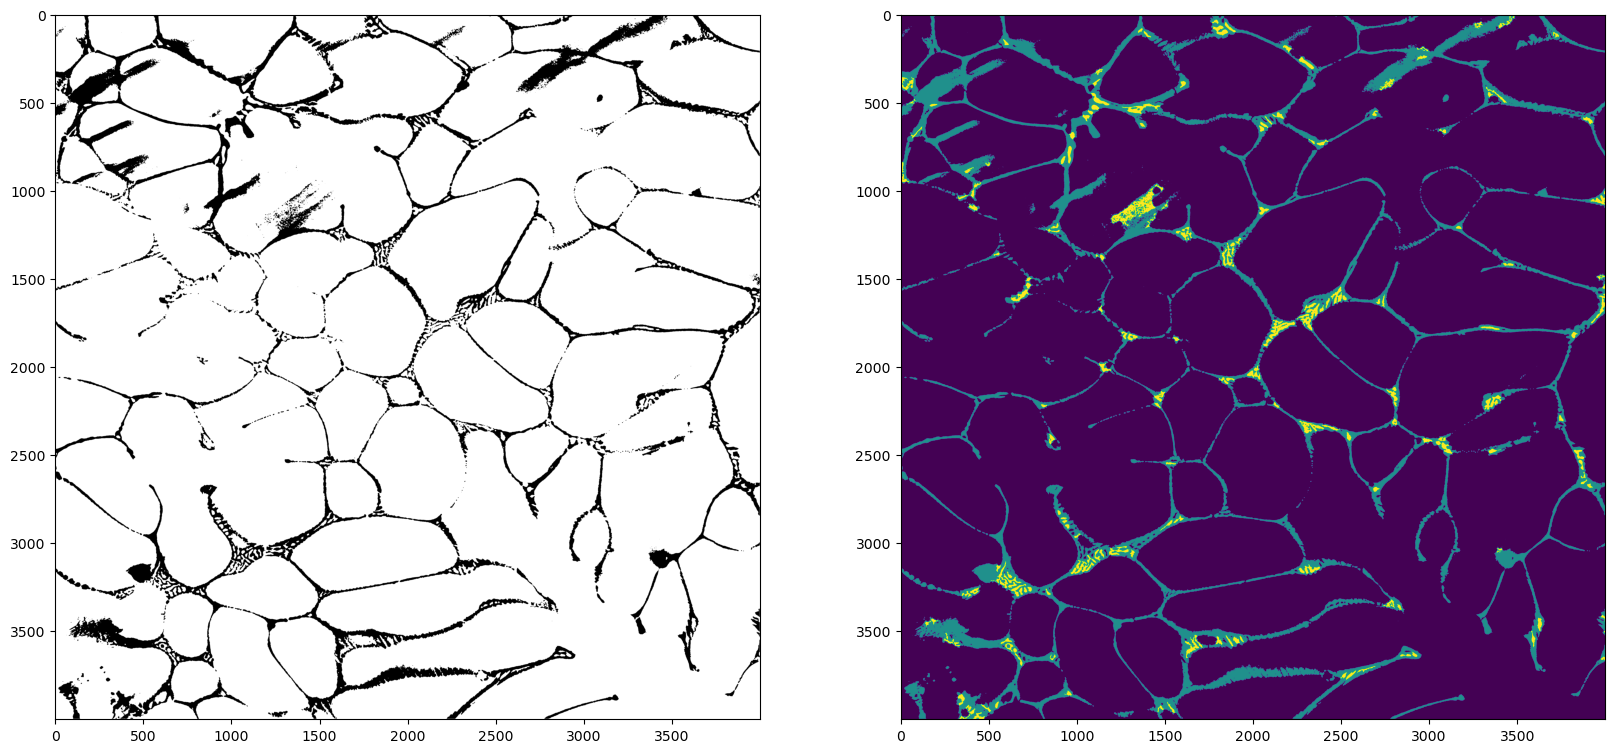

In [265]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap='gray')
# ax[0].set_xlim([1000,2500])
# ax[0].set_ylim([1000,2500])
ax[1].imshow(total_ms)
# ax[1].set_xlim([1000,2500])
# ax[1].set_ylim([1000,2500])

In [130]:
plt.imsave("total_ms.png",total_ms,cmap='viridis')

In [139]:
for fp in filepath.glob(('**/bnw_conv.png')):
    print(fp)

/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c002_r001/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c009_r000/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_head_eps5_yolo_pano_c005_r000/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c006_r006/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_4mm_3_eps5_000_stitch_c007_r003/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c011_r004/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_4mm_3_eps5_000_stitch_c007_r006/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c006_r000/bnw_conv.png
/home/mz071159/width_struts/results/50_45_leofor_t

In [145]:
fp.parents[1].joinpath(f'{fp.parents[0].stem}_total_ms.png')

PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/pano50_45_eps5_leo_5mm_3_stitch_c004_r002_total_ms.png')

In [146]:
    plt.imsave(fp.parents[1].joinpath(f'{fp.parents[0].stem}_total_ms.png'),total_ms,cmap='viridis')

In [158]:
filepath.joinpath('full_segmentation').mkdir(parents=True,exist_ok=True)
filepath.joinpath('only_eutectics').mkdir(parents=True,exist_ok=True)
filepath.joinpath('primary_mg').mkdir(parents=True,exist_ok=True)

In [156]:
filepath.joinpath('full_segmentation')

PosixPath('/home/mz071159/width_struts/results/50_45_leofor_thresholding/full_segmentation')

In [159]:
    plt.imsave(fp.parents[1].joinpath('full_segmentation').joinpath(f'{fp.parents[0].stem}_total_ms.png'),total_ms,cmap='viridis')
    plt.imsave(fp.parents[1].joinpath('only_eutectics').joinpath(f'{fp.parents[0].stem}_eutectics.png'),mg_eut_filtered,cmap='viridis')

    plt.imsave(fp.parents[1].joinpath('primary_mg').joinpath(f'{fp.parents[0].stem}_mg_primary.png'),mg_primary,cmap='viridis') 

In [27]:
import matplotlib.pyplot as plt

In [28]:
mg_holes_removed=morphology.remove_small_holes(mg_primary==True,50000)

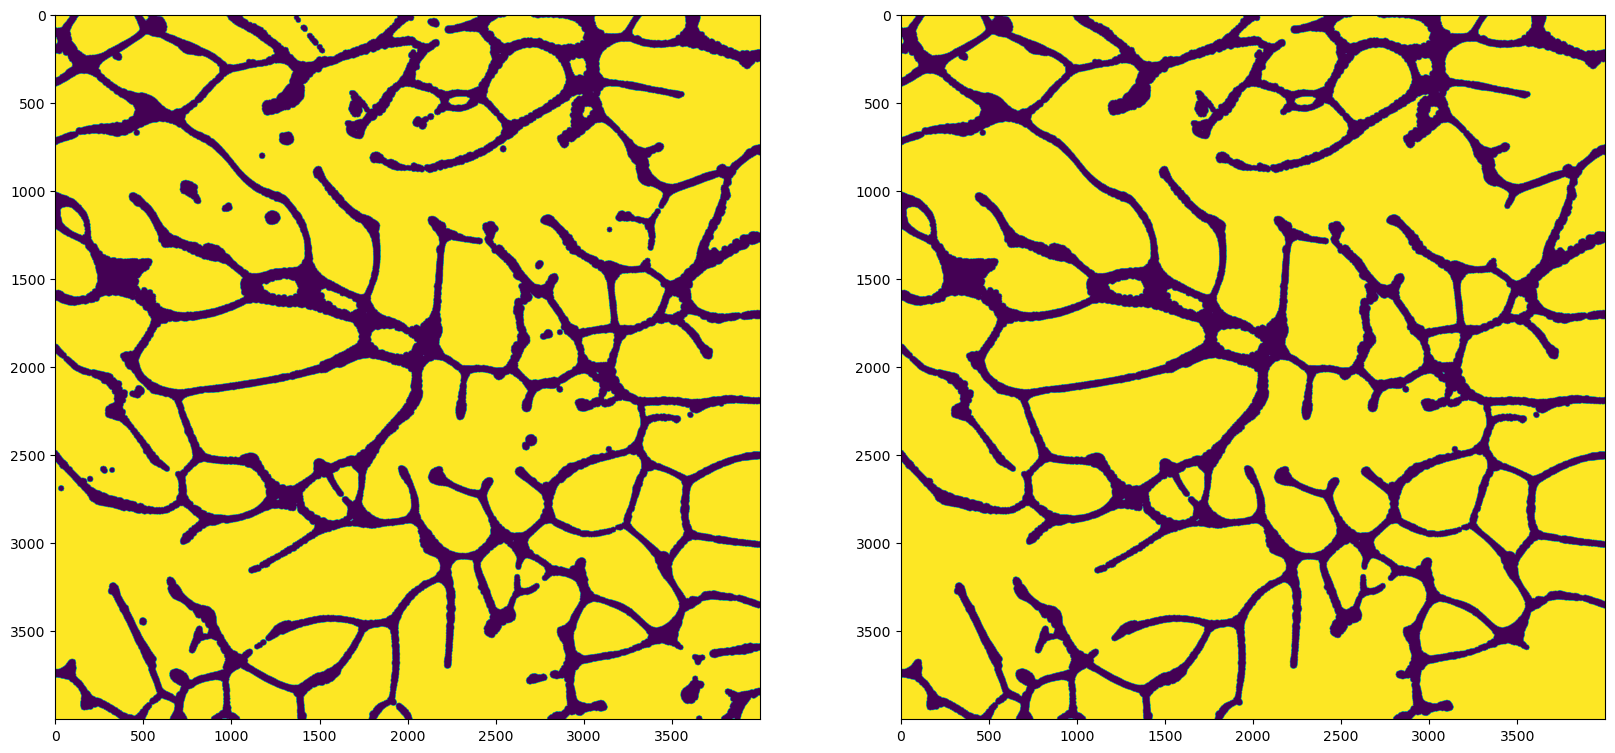

In [29]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(mg_primary)
ax[1].imshow(mg_holes_removed)

In [32]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
label_img = label(mg_holes_removed)
regions = regionprops(label_img,mg_holes_removed)

In [33]:
# l_img=morphology.label(invert(closing))
properties=['label','bbox','area','area_convex','euler_number','image','perimeter']
props=measure.regionprops_table(label_img,mg_holes_removed,properties=properties)
df=pd.DataFrame(props)
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,area,area_convex,euler_number,image,perimeter
0,1,0,0,79,91,5003,5112,1,"[[True, True, True, True, True, True, True, Tr...",304.059921
1,2,0,85,236,481,68632,69584,1,"[[False, False, False, False, False, False, Fa...",1088.376767
2,3,0,490,38,535,840,982,1,"[[True, True, True, True, True, True, True, Tr...",132.432504
3,4,0,573,288,1247,103863,115617,1,"[[False, False, True, True, True, True, True, ...",1701.976839
4,5,0,1043,274,1948,146272,154219,1,"[[True, True, True, True, True, True, True, Tr...",2124.585966
...,...,...,...,...,...,...,...,...,...,...
67,68,3764,0,4000,366,41357,50575,1,"[[False, False, False, False, False, False, Fa...",1157.907684
68,69,3778,726,4000,959,41214,42385,1,"[[False, False, False, False, False, False, Fa...",816.535101
69,70,3881,512,4000,680,13581,14311,1,"[[False, False, False, False, False, False, Fa...",499.883297
70,71,3997,949,4000,976,55,63,1,"[[False, False, False, False, False, False, Fa...",44.414214


In [51]:
skel=morphology.skeletonize(mg_holes_removed)

In [35]:
plt.imshow(skel,cmap='binary')

NameError: name 'skel' is not defined

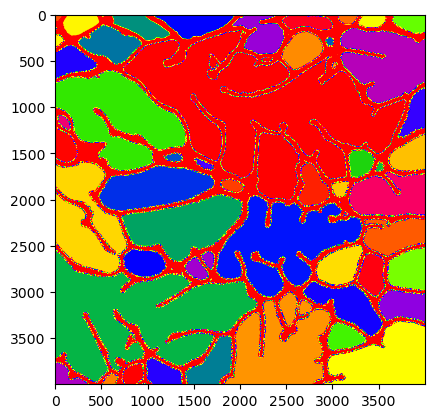

In [63]:
plt.imshow(label_img,cmap='prism')

In [64]:
plt.imsave("labeled_ms.png",label_img,cmap='gist_rainbow')

In [38]:
dilation_skel=scipy.ndimage.binary_dilation(skel!=0,disk(5),iterations=2)

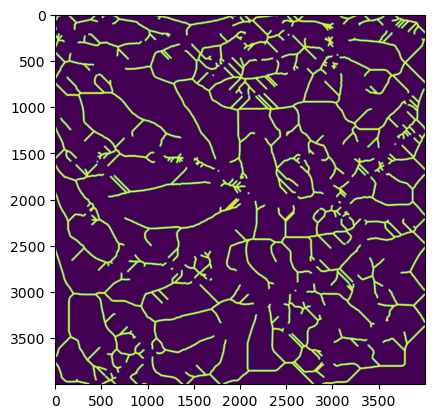

In [39]:
plt.imshow(dilation_skel)

In [40]:
# skel2, distance = morphology.medial_axis(mg_holes_removed, return_distance=True)

NameError: name 'skel2' is not defined

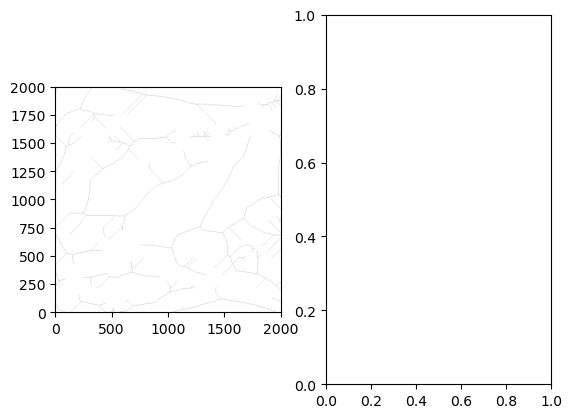

In [41]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(skel,cmap='binary')
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,2000])
ax[1].imshow(skel2,cmap='binary')
ax[1].set_xlim([0,2000])
ax[1].set_ylim([0,2000])

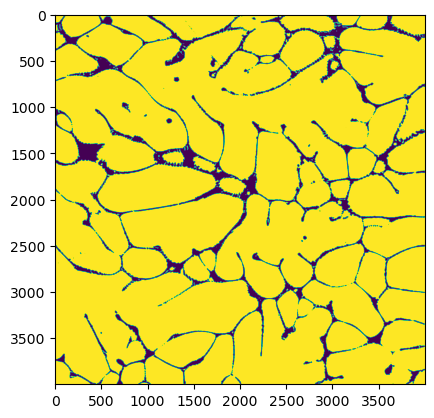

In [42]:
plt.imshow(total_ms==0)

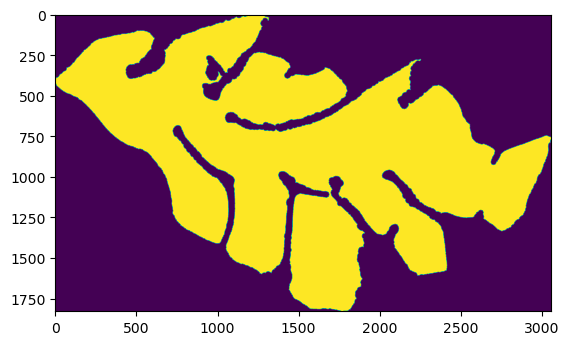

In [43]:
plt.imshow(regions[13].image)

In [44]:
regions[13].perimeter
regions[13].area

2558523

Text(0, 0.5, 'perimeter over radius')

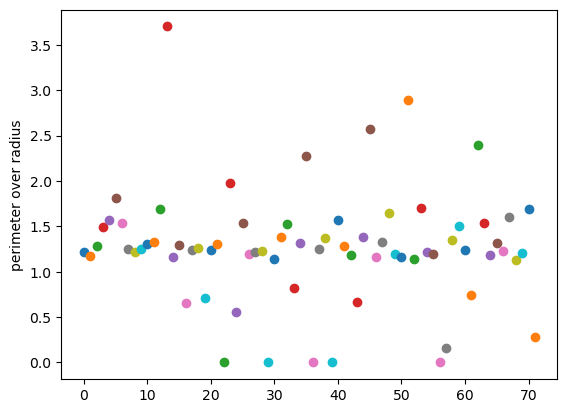

In [45]:
i=0
l_list=[]
for region in regions:
    plt.scatter(i,(region.perimeter)/(region.equivalent_diameter_area*3.1415))
    if(region.perimeter)/(region.equivalent_diameter_area*3.1415)>1.5:
        l_list.append(region.label)
    i=i+1
plt.ylabel('perimeter over radius')

In [46]:
shattered=np.isin(label_img,l_list)

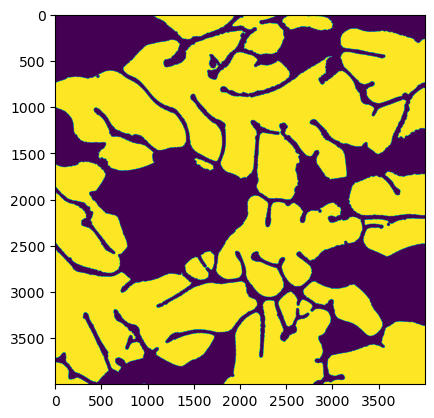

In [47]:
plt.imshow(shattered)

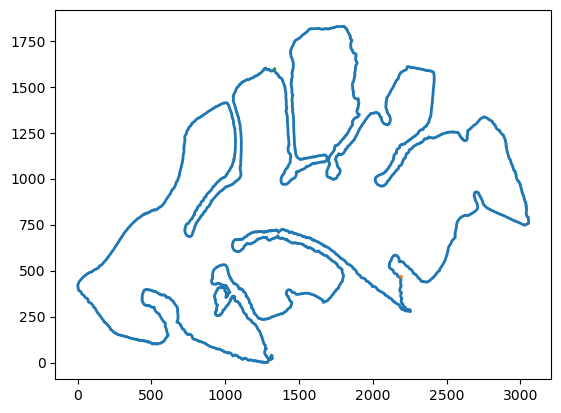

In [423]:
imgi=regions[13].image
imgi[:,0]=0
imgi[:,-1]=0
imgi[-1,:]=0
imgi[0,:]=0
cons=find_contours(imgi,fully_connected='low',positive_orientation='low')
fig, ax = plt.subplots()
# ax.imshow(r, cmap=plt.cm.gray)
for contour in cons:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [443]:
region[13]

NameError: name 'region' is not defined

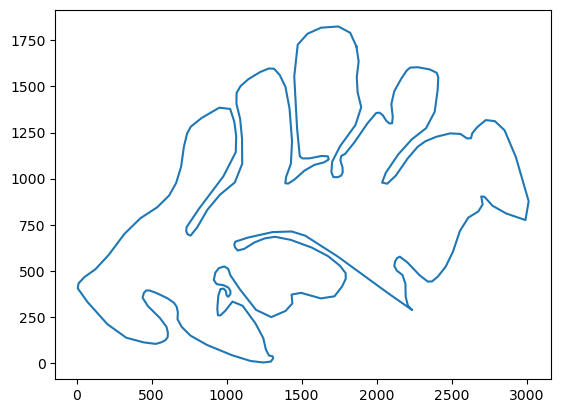

In [442]:
coords = approximate_polygon(cons[0], tolerance=2.5)
# plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
coords2 = approximate_polygon(cons[0], tolerance=20)
# plt.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
sub=subdivide_polygon(coords2, degree=2, preserve_ends=True)
plt.plot(sub[:,1],sub[:,0])

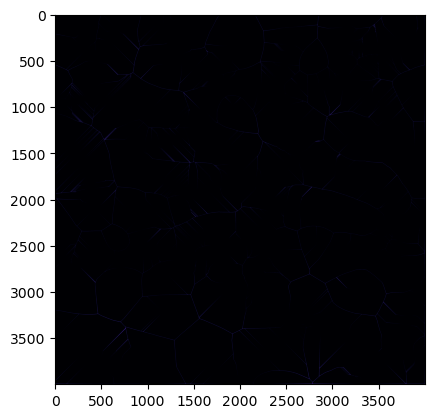

In [ ]:
plt.imshow(dist_on_skel, cmap='magma')
# ax[1].contour(blobs, [0.5], colors='w')
# ax[1].set_title('medial_axis')
# ax[1].axis('off')